<a href="https://colab.research.google.com/github/Raoolo/University/blob/main/MachineDeepLearning/Lab1/Es4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch, torchvision
from torch.utils.data import Dataset

In [2]:
class loadCIFAR(Dataset):
  def __init__(self, bs = 1):
    self.dataTrain = torchvision.datasets.CIFAR10(root='sample_data/', download=True, transform=torchvision.transforms.ToTensor())
    self.dataTest = torchvision.datasets.CIFAR10(root='sample_data/', download=True, train=False, transform=torchvision.transforms.ToTensor())
    self.trainLoader = torch.utils.data.DataLoader(self.dataTrain, batch_size=bs, shuffle=True)
    self.testLoader = torch.utils.data.DataLoader(self.dataTest, batch_size=bs, shuffle=True)

  def __len__(self):
    return len(self.dataTrain)    #non serve a nulla per ora?

  def __getitem__(self, index):
    return self.dataTrain[index][0], self.dataTrain[index][1], index


In [3]:
cif = loadCIFAR()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting sample_data/cifar-10-python.tar.gz to sample_data/
Files already downloaded and verified


In [4]:
trainData = cif.dataTrain
testData = cif.dataTest
trainLoader = cif.trainLoader
testLoader =  cif.testLoader

In [5]:
trainData, testData, trainLoader, testLoader

(Dataset CIFAR10
     Number of datapoints: 50000
     Root location: sample_data/
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset CIFAR10
     Number of datapoints: 10000
     Root location: sample_data/
     Split: Test
     StandardTransform
 Transform: ToTensor(), <torch.utils.data.dataloader.DataLoader at 0x7f9058293640>, <torch.utils.data.dataloader.DataLoader at 0x7f90582931c0>)

Plot some images

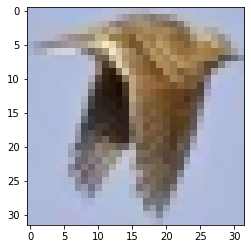

In [6]:
import numpy as np
import matplotlib.pyplot as plt
toPlot = trainData[123][0].numpy()
plt.imshow(np.transpose(toPlot, (1, 2, 0)))     #need to also change the order of the axes


In [7]:
labels_map = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer", 5:
"dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

Plot random pics

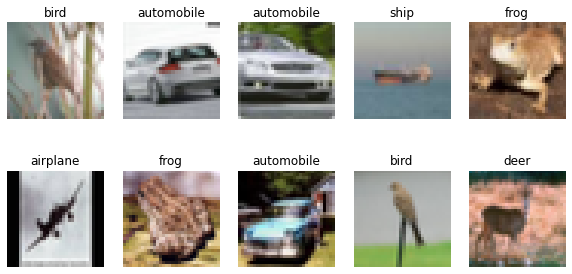

In [8]:
figure = plt.figure(figsize=(10, 5))
cols, rows = 5, 2
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainData), size=(1,)).item()
    img, label = trainData[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    toPlot = img.numpy()
    plt.imshow(np.transpose(toPlot, (1, 2, 0)))     #need to also change the order of the axes
plt.show()

In [9]:
next(iter(trainLoader))

[tensor([[[[0.6471, 0.6588, 0.6667,  ..., 0.4588, 0.5490, 0.6039],
           [0.6549, 0.6863, 0.7059,  ..., 0.5412, 0.5725, 0.6196],
           [0.6902, 0.7176, 0.7451,  ..., 0.5725, 0.6078, 0.5843],
           ...,
           [0.3765, 0.4157, 0.4235,  ..., 0.3765, 0.4902, 0.6941],
           [0.4863, 0.6078, 0.6314,  ..., 0.4196, 0.4588, 0.6471],
           [0.5765, 0.5922, 0.5922,  ..., 0.3686, 0.4471, 0.6627]],
 
          [[0.4667, 0.4549, 0.4667,  ..., 0.3686, 0.4510, 0.4980],
           [0.4588, 0.4824, 0.5216,  ..., 0.4471, 0.4784, 0.5137],
           [0.4863, 0.5137, 0.5647,  ..., 0.4706, 0.5098, 0.4824],
           ...,
           [0.2549, 0.3020, 0.3059,  ..., 0.2471, 0.4235, 0.6431],
           [0.3569, 0.4706, 0.5020,  ..., 0.3020, 0.3765, 0.6000],
           [0.4431, 0.4510, 0.4627,  ..., 0.2627, 0.3647, 0.6118]],
 
          [[0.2980, 0.2902, 0.2902,  ..., 0.2667, 0.3294, 0.3765],
           [0.2941, 0.3176, 0.3373,  ..., 0.3294, 0.3529, 0.3882],
           [0.3255, 0.34

Plot a photo for each category

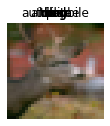

In [10]:
figure2 = plt.figure(figsize=(10, 5))
cols, rows = 5, 2
datas = []
labels = []
for i in range(1, cols * rows + 1):
  for data, label in trainLoader:
    if len(labels) < 10:
      if label.item() not in labels:
          labels.append(label.item())
          #datas.append(data)
          figure2.add_subplot(rows, cols, i)
          plt.title(labels_map[label.item()])
          plt.axis("off")
          toPlot = data.squeeze().numpy()
          plt.imshow(np.transpose(toPlot, (1, 2, 0)))
    else: 
      break
#torchvision.utils.make_grid(datas, labels)
plt.show()

In [11]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [12]:
########################################################################
# 2. Define a Convolutional Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

########################################################################
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize.

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainLoader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

########################################################################
# Let's quickly save our trained model:

PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

########################################################################
# See `here <https://pytorch.org/docs/stable/notes/serialization.html>`_
# for more details on saving PyTorch models.
#
# 5. Test the network on the test data
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# We have trained the network for 2 passes over the training dataset.
# But we need to check if the network has learnt anything at all.
#
# We will check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
#
# Okay, first step. Let us display an image from the test set to get familiar.

dataiter = iter(testLoader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{labels_map[labels[j]]:5s}' for j in range(4)))

########################################################################
# Next, let's load back in our saved model (note: saving and re-loading the model
# wasn't necessary here, we only did it to illustrate how to do so):

net = Net()
net.load_state_dict(torch.load(PATH))

########################################################################
# Okay, now let us see what the neural network thinks these examples above are:

outputs = net(images)

########################################################################
# The outputs are energies for the 10 classes.
# The higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{labels_map[predicted[j]]:5s}'
                              for j in range(4)))

########################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

########################################################################
# That looks way better than chance, which is 10% accuracy (randomly picking
# a class out of 10 classes).
# Seems like the network learnt something.
#
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:

# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in labels_map}
total_pred = {classname: 0 for classname in labels_map}

# again no gradients needed
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[labels_map[label]] += 1
            total_pred[labels_map[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

########################################################################
# Okay, so what next?
#
# How do we run these neural networks on the GPU?
#
# Training on GPU
# ----------------
# Just like how you transfer a Tensor onto the GPU, you transfer the neural
# net onto the GPU.
#
# Let's first define our device as the first visible cuda device if we have
# CUDA available:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

########################################################################
# The rest of this section assumes that ``device`` is a CUDA device.
#
# Then these methods will recursively go over all modules and convert their
# parameters and buffers to CUDA tensors:
#
# .. code:: python
#
#     net.to(device)
#
#
# Remember that you will have to send the inputs and targets at every step
# to the GPU too:
#
# .. code:: python
#
#         inputs, labels = data[0].to(device), data[1].to(device)
#
# Why don't I notice MASSIVE speedup compared to CPU? Because your network
# is really small.
#
# **Exercise:** Try increasing the width of your network (argument 2 of
# the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
# they need to be the same number), see what kind of speedup you get.
#
# **Goals achieved**:
#
# - Understanding PyTorch's Tensor library and neural networks at a high level.
# - Train a small neural network to classify images
#
# Training on multiple GPUs
# -------------------------
# If you want to see even more MASSIVE speedup using all of your GPUs,
# please check out :doc:`data_parallel_tutorial`.
#
# Where do I go next?
# -------------------
#
# -  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
# -  `Train a state-of-the-art ResNet network on imagenet`_
# -  `Train a face generator using Generative Adversarial Networks`_
# -  `Train a word-level language model using Recurrent LSTM networks`_
# -  `More examples`_
# -  `More tutorials`_
# -  `Discuss PyTorch on the Forums`_
# -  `Chat with other users on Slack`_
#
# .. _Train a state-of-the-art ResNet network on imagenet: https://github.com/pytorch/examples/tree/master/imagenet
# .. _Train a face generator using Generative Adversarial Networks: https://github.com/pytorch/examples/tree/master/dcgan
# .. _Train a word-level language model using Recurrent LSTM networks: https://github.com/pytorch/examples/tree/master/word_language_model
# .. _More examples: https://github.com/pytorch/examples
# .. _More tutorials: https://github.com/pytorch/tutorials
# .. _Discuss PyTorch on the Forums: https://discuss.pytorch.org/
# .. _Chat with other users on Slack: https://pytorch.slack.com/messages/beginner/

# %%%%%%INVISIBLE_CODE_BLOCK%%%%%%
del dataiter
# %%%%%%INVISIBLE_CODE_BLOCK%%%%%%

[1,  2000] loss: 2.302
[1,  4000] loss: 2.243
[1,  6000] loss: 2.112
[1,  8000] loss: 2.099
[1, 10000] loss: 2.031
[1, 12000] loss: 1.958
[1, 14000] loss: 1.952
[1, 16000] loss: 1.906
[1, 18000] loss: 1.904
[1, 20000] loss: 1.850
[1, 22000] loss: 1.842
[1, 24000] loss: 1.812
[1, 26000] loss: 1.783
[1, 28000] loss: 1.805
[1, 30000] loss: 1.817
[1, 32000] loss: 1.797
[1, 34000] loss: 1.750
[1, 36000] loss: 1.785
[1, 38000] loss: 1.744
[1, 40000] loss: 1.725
[1, 42000] loss: 1.723
[1, 44000] loss: 1.724
[1, 46000] loss: 1.678
[1, 48000] loss: 1.697
[1, 50000] loss: 1.709
[2,  2000] loss: 1.681
[2,  4000] loss: 1.698


KeyboardInterrupt: ignored